# Statistics: demonstraction of $\chi^2$ distribution

A variable $Q$ resulting from the sum of the square of $k$ random variables $X$ normally distributed is said to be $\chi^2$-distributed, see [wiki](https://en.wikipedia.org/wiki/Chi-square_distribution).

$$
Q = \sum^{k}X^2 \implies Q \sim \chi^2(k)
$$

In this notebook we use random sampling to illustrate $\chi^2$ distribution from its basis definition.

We start by importing required tools.

In [1]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To compute the histograms of $Q$ we repeat $n$ *measurements* of the $X$'s summed that give rise to $Q$.

This can be done with a simple list comprehension as provided in `perform_measurements`.

In [2]:
def perform_measurements(n, k):
    """ Generate numbers as per chi2 definition. """
    return [sum(np.random.normal(size=k)**2) for _ in range(n)]

Just following the *separation of concerns* principle, we provide a function for plotting the histogram.

In [3]:
def plot_demonstration(x, y, measures, title, bins):
    """ Plot theoretical and empirical chi2 distribution. """
    plt.close('all')
    plt.style.use('seaborn-white')
    plt.hist(measures, bins=bins, density=True,
             label='$\chi^2$ empirical')
    plt.plot(x, y, label='$\chi^2$ theoretical')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.legend(loc=1)

To be able to compute distributions for different degrees of freedom $k$ or different sample sizes $n$ another function is provided.

Here we make use of `scipy.stats.chi2` to provide a comparison between the sampling method to the theoretical distribution.

In [4]:
def demonstration(n, k, bins=100):
    """ Evaluate empirical function and plot results. """
    measures = perform_measurements(n, k)

    x = np.linspace(0, max(measures), 100)
    y = chi2.pdf(x, k)

    title = F'$\chi^2$ with k={k} ({n} samples)'
    
    plot_demonstration(x, y, measures, title, bins)

Now we can graphically check if the method converges!

The next cells present the distribution for varying $k$.

A sample number of `100_000` seems adequate for getting smooth histograms.

Notice tha the maximum always fall slightly below $k$, can you reason why?

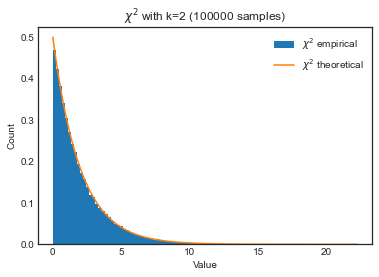

In [5]:
demonstration(100_000, 2)

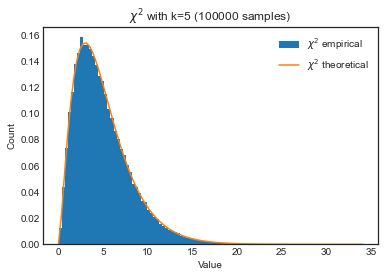

In [6]:
demonstration(100_000, 5)

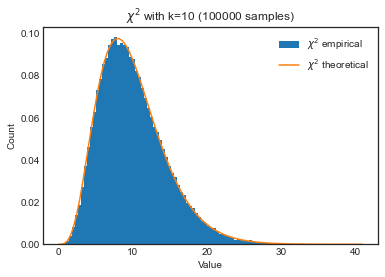

In [7]:
demonstration(100_000, 10)

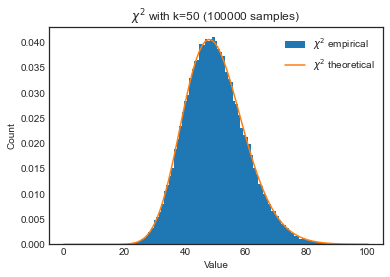

In [8]:
demonstration(100_000, 50)

That's it! In this notebook we have shown $\chi^2$ distribution without doing any Math!